In [13]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'real-estate-365520' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=real-estate-365520:US:bquxjob_482bb3e2_184b0f4effe)
back to BigQuery to edit the query within the BigQuery user interface.

In [14]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_482bb3e2_184b0f4effe') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM ML.FORECAST(MODEL redfin_dataset.forecast_model, 
                  STRUCT(30 AS horizon, 0.8 AS confidence_level))


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [15]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_482bb3e2_184b0f4effe') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
0,2022-09-01 00:00:00+00:00,385531.137948,3915.397484,0.8,380510.476048,390551.799849,380510.476048,390551.799849
1,2022-10-01 00:00:00+00:00,392005.706830,5676.535546,0.8,384726.761116,399284.652544,384726.761116,399284.652544
2,2022-11-01 00:00:00+00:00,392252.231339,7124.180880,0.8,383116.989347,401387.473330,383116.989347,401387.473330
3,2022-12-01 00:00:00+00:00,392871.533123,8426.080221,0.8,382066.882996,403676.183251,382066.882996,403676.183251
4,2023-01-01 00:00:00+00:00,392608.245074,9645.386359,0.8,380240.094969,404976.395178,380240.094969,404976.395178
5,2023-02-01 00:00:00+00:00,395766.002772,10813.588757,0.8,381899.882335,409632.123208,381899.882335,409632.123208
6,2023-03-01 00:00:00+00:00,408484.841033,11948.861763,0.8,393162.975184,423806.706883,393162.975184,423806.706883
7,2023-04-01 00:00:00+00:00,414527.034653,13062.697390,0.8,397776.912256,431277.157051,397776.912256,431277.157051
8,2023-05-01 00:00:00+00:00,414616.606851,14162.831532,0.8,396455.797137,432777.416566,396455.797137,432777.416566
9,2023-06-01 00:00:00+00:00,419856.678517,15254.713938,0.8,400295.762576,439417.594458,400295.762576,439417.594458


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [16]:
results.describe()

,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,426339.843053,21313.347656,8.000000e-01,399010.022016,453669.664091,399010.022016,453669.664091
std,23073.725395,10015.049844,2.258405e-16,10834.665448,35738.578845,10834.665448,35738.578845
min,385531.137948,3915.397484,8.000000e-01,380240.094969,390551.799849,380240.094969,390551.799849
25%,414549.427703,13337.730925,8.000000e-01,393635.901832,431652.221930,393635.901832,431652.221930
50%,423550.644703,21249.787807,8.000000e-01,397514.310711,450798.963796,397514.310711,450798.963796
75%,448169.759043,29412.005033,8.000000e-01,409505.132255,486930.611855,409505.132255,486930.611855
max,458876.088173,38043.218473,8.000000e-01,413818.995836,507658.399115,413818.995836,507658.399115


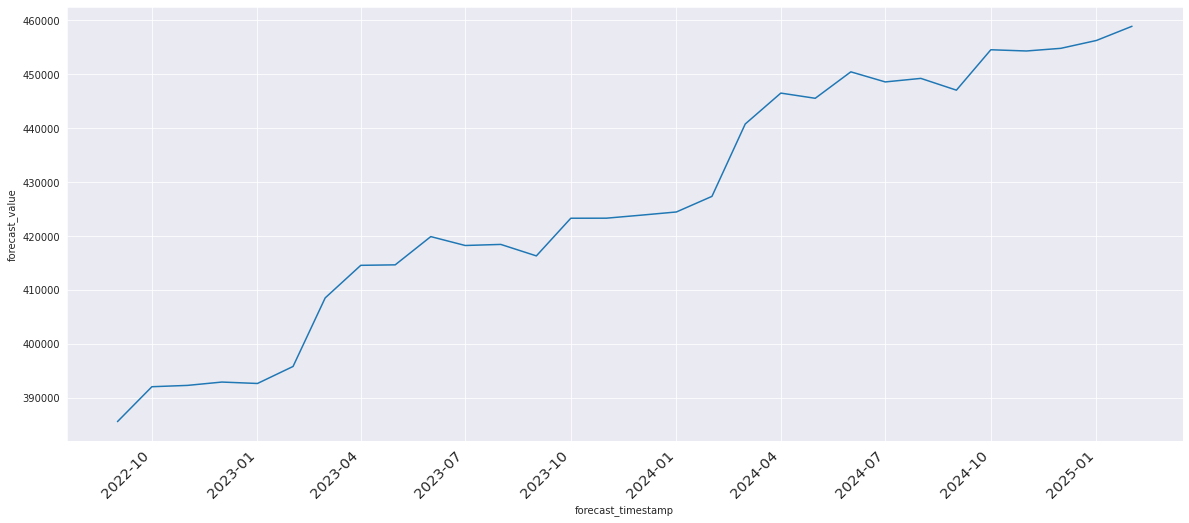

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')  

sns.set_style("dark")

sns.lineplot(x = "forecast_timestamp", y = "forecast_value", data = results)
  
plt.show()